Optimization of CER comunity
starting from the optimization between load and production for a village

In [526]:
#importing libraries

import pandas as pd
import os
import pyomo.environ as pyo 
import numpy  as np
import matplotlib.pyplot as plt
import datetime
Data_path = "C:\Users\Nik\Documents\GitHub\Thesis\CSV"




,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
20190101:0010,0.0,0.0,0.0,-1.91,2.14,0.0
20190101:0110,0.0,0.0,0.0,-2.68,2.14,0.0
20190101:0210,0.0,0.0,0.0,-2.98,2.07,0.0
20190101:0310,0.0,0.0,0.0,-3.06,2.00,0.0
20190101:0410,0.0,0.0,0.0,-3.47,1.93,0.0
...,...,...,...,...,...,...
20191231:1910,0.0,0.0,0.0,1.76,1.03,0.0
20191231:2010,0.0,0.0,0.0,1.36,1.03,0.0
20191231:2110,0.0,0.0,0.0,0.79,1.03,0.0


Import of Solar irradiance from PVGIS
We take into account three different installation: South, East, West side of the roof

In [ ]:
DF_name = "2019_ProductionEast.csv"
DF_path = os.path.join(Data_path, DF_name)
DF_East = pd.read_csv(DF_path,sep=",",on_bad_lines='skip', index_col=0, header=0,parse_dates=[0])
DF_East


In [527]:
DF_name = "2019_ProductionSouth.csv"
DF_path = os.path.join(Data_path, DF_name)
DF_South = pd.read_csv(DF_path,sep=",",on_bad_lines='skip', index_col=0, header=0,parse_dates=[0])
DF_South

,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
20190101:0010,0.0,0.0,0.0,-1.91,2.14,0.0
20190101:0110,0.0,0.0,0.0,-2.68,2.14,0.0
20190101:0210,0.0,0.0,0.0,-2.98,2.07,0.0
20190101:0310,0.0,0.0,0.0,-3.06,2.00,0.0
20190101:0410,0.0,0.0,0.0,-3.47,1.93,0.0
...,...,...,...,...,...,...
20191231:1910,0.0,0.0,0.0,1.76,1.03,0.0
20191231:2010,0.0,0.0,0.0,1.36,1.03,0.0
20191231:2110,0.0,0.0,0.0,0.79,1.03,0.0


In [528]:
DF_name = "2019_ProductionWest.csv"
DF_path = os.path.join(Data_path, DF_name)
DF_West = pd.read_csv(DF_path,sep=",",on_bad_lines='skip', index_col=0, header=0,parse_dates=[0])
DF_West

,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
20190101:0010,0.0,0.0,0.0,-1.91,2.14,0.0
20190101:0110,0.0,0.0,0.0,-2.68,2.14,0.0
20190101:0210,0.0,0.0,0.0,-2.98,2.07,0.0
20190101:0310,0.0,0.0,0.0,-3.06,2.00,0.0
20190101:0410,0.0,0.0,0.0,-3.47,1.93,0.0
...,...,...,...,...,...,...
20191231:1910,0.0,0.0,0.0,1.76,1.03,0.0
20191231:2010,0.0,0.0,0.0,1.36,1.03,0.0
20191231:2110,0.0,0.0,0.0,0.79,1.03,0.0


Merge of all the Irradiances from the three configurations

In [529]:
DF_East = pd.concat([DF_East, DF_South["G(i)"].rename("G(i)_South")],axis=1)
DF_East = pd.concat([DF_East, DF_West["G(i)"].rename("G(i)_West")],axis=1)
DF_East.rename(columns={"G(i)": "G(i)_East"}, inplace=True)
DF_East.drop(columns=['P','H_sun','T2m','WS10m','Int'],inplace=True)
DF_Production = DF_East


,P,G(i)_East,H_sun,T2m,WS10m,Int,G(i)_South,G(i)_West
time,,,,,,,,
20190101:0010,0.0,0.0,0.0,-1.91,2.14,0.0,0.0,0.0
20190101:0110,0.0,0.0,0.0,-2.68,2.14,0.0,0.0,0.0
20190101:0210,0.0,0.0,0.0,-2.98,2.07,0.0,0.0,0.0
20190101:0310,0.0,0.0,0.0,-3.06,2.00,0.0,0.0,0.0
20190101:0410,0.0,0.0,0.0,-3.47,1.93,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
20191231:1910,0.0,0.0,0.0,1.76,1.03,0.0,0.0,0.0
20191231:2010,0.0,0.0,0.0,1.36,1.03,0.0,0.0,0.0
20191231:2110,0.0,0.0,0.0,0.79,1.03,0.0,0.0,0.0


Initialize the variables needed for the approximation of the production of PV panels starting from Irradiance Datas

In [531]:
# Percentage of PV panels installed for the specific orientation
percentage_south = 0.5
percentage_east = 0.25
percentage_west = 0.25



In [ ]:
DF_Production.insert(3,"Tot_Production [W/m2]", DF_Production.loc[:,"G(i)_East"]* percentage_east  + DF_Production.loc[:,"G(i)_West"]*percentage_west + DF_Production.loc[:,"G(i)_South"]*percentage_south)
DF_Production

Import of consumption curves for residential, industrial and commercial units taken from Prof. data (Risolutore)

In [534]:
DF_name = "2019_ConsumptionCurve.csv"
DF_path = os.path.join(Data_path, DF_name)
DF = pd.read_csv(DF_path,sep=",",on_bad_lines='skip', index_col=0, header=0, parse_dates=[0])
DF


,Residential,Industrial,Commercial
time,,,
20190101:0010,0.001165,0.003729,0.007711
20190101:0110,0.001123,0.003731,0.007434
20190101:0210,0.001076,0.003686,0.007127
20190101:0310,0.001056,0.003648,0.006994
20190101:0410,0.001058,0.003737,0.007008
...,...,...,...
20191231:1910,0.001667,0.004813,0.011035
20191231:2010,0.001502,0.004261,0.009947
20191231:2110,0.001406,0.003970,0.009307


In [535]:
DF_Production.insert(4,'Consumption_Residential [W/m2]', DF.loc[:,'Residential'])
DF_Production.insert(4,'Consumption_Industrial [W/m2]', DF.loc[:,'Industrial'])
DF_Production.insert(4,'Consumption_Commercial [W/m2]', DF.loc[:,'Commercial'])
DF_Production


,G(i)_East,G(i)_South,G(i)_West,Tot_Production [W/m2],Consumption_Commercial [W/m2],Consumption_Industrial [W/m2],Consumption_Residential [W/m2]
time,,,,,,,
20190101:0010,0.0,0.0,0.0,0.0,0.007711,0.003729,0.001165
20190101:0110,0.0,0.0,0.0,0.0,0.007434,0.003731,0.001123
20190101:0210,0.0,0.0,0.0,0.0,0.007127,0.003686,0.001076
20190101:0310,0.0,0.0,0.0,0.0,0.006994,0.003648,0.001056
20190101:0410,0.0,0.0,0.0,0.0,0.007008,0.003737,0.001058
...,...,...,...,...,...,...,...
20191231:1910,0.0,0.0,0.0,0.0,0.011035,0.004813,0.001667
20191231:2010,0.0,0.0,0.0,0.0,0.009947,0.004261,0.001502
20191231:2110,0.0,0.0,0.0,0.0,0.009307,0.003970,0.001406


<AxesSubplot:xlabel='time'>

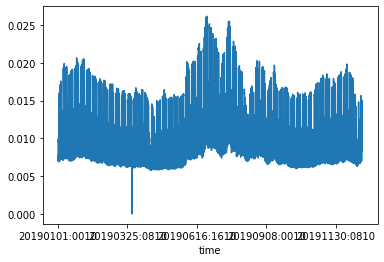

In [537]:
DF_Production['Consumption_Commercial [W/m2]'].plot()


<AxesSubplot:xlabel='time'>

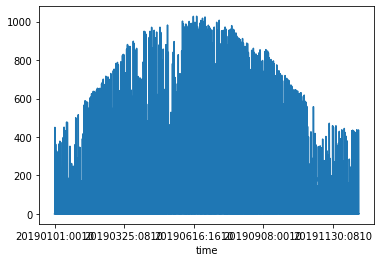

In [536]:
DF_Production["G(i)_East"].plot()

Optimization model

In [ ]:
'''

m = pyo.ConcreteModel()

#sets definition

m.U = pyo.Set(initialize = ['Residential','Industrial','Commercial']) #utenti
m.U_C = pyo.Set(within = m.I, initialize = ['Consumer']) #chi consuma 
m.U_P = pyo.Set(within = m.I, initialize = ['Producer']) #chi produce
m.I_CP = pyo.Set(within = m.I, initialize = ['Prosumer']) #chi consuma e produce

#variables definition
#residential
m.RC = pyo.Var(m.I_f, m.T, domain=pyo.NonNegativeIntegers) #numero di residential consumer
m.RCP = pyo.Var(m.I_th, m.T, domain=pyo.NonNegativeIntegers) #numero di residential prosumer
m.RP = pyo.Var(m.I_el, m.T, domain=pyo.NonNegativeIntegers) #numero di residential producer
#industrial
m.IC = pyo.Var(m.I_f, m.T, domain=pyo.NonNegativeIntegers) #numero di industrial consumer
m.ICP = pyo.Var(m.I_th, m.T, domain=pyo.NonNegativeIntegers) #numero di industrial prosumer
m.IP = pyo.Var(m.I_el, m.T, domain=pyo.NonNegativeIntegers) #numero di industrial producer
#commercial
m.CC = pyo.Var(m.I_f, m.T, domain=pyo.NonNegativeIntegers) #numero di commercial consumer
m.CCP = pyo.Var(m.I_th, m.T, domain=pyo.NonNegativeIntegers) #numero di commercial prosumer
m.CP = pyo.Var(m.I_el, m.T, domain=pyo.NonNegativeIntegers) #numero di commercial producer


m.obj=pyo.Objective(rule=obj_fun,sense=pyo.minimize)
'''